In [64]:
import csv

# Define the CSV file path
csv_file = 'C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-2.csv'

# Create an empty list to store the data
data = []

# Open the CSV file and read the rows
with open(csv_file, 'r') as file:
    reader = csv.reader(file, delimiter=';')
    next(reader)  # skip the header row
    for row in reader:
        # Split the columns and store the values in a dictionary
        item = {
            'day': row[0],
            'timestamp': row[1],
            'product': row[2],
            'bid_price_1': row[3],
            'bid_volume_1': row[4],
            'bid_price_2': row[5],
            'bid_volume_2': row[6],
            'bid_price_3': row[7],
            'bid_volume_3': row[8],
            'ask_price_1': row[9],
            'ask_volume_1': row[10],
            'ask_price_2': row[11],
            'ask_volume_2': row[12],
            'ask_price_3': row[13],
            'ask_volume_3': row[14],
            'mid_price': row[15],
            'profit_and_loss': row[16],
        }
        
        # Append the dictionary to the data list
        data.append(item)

# Print the first 5 items in the data list
print(data[:10])


[{'day': '-2', 'timestamp': '0', 'product': 'BANANAS', 'bid_price_1': '4997', 'bid_volume_1': '26', 'bid_price_2': '', 'bid_volume_2': '', 'bid_price_3': '', 'bid_volume_3': '', 'ask_price_1': '5003', 'ask_volume_1': '26', 'ask_price_2': '', 'ask_volume_2': '', 'ask_price_3': '', 'ask_volume_3': '', 'mid_price': '5000.0', 'profit_and_loss': '0.0'}, {'day': '-2', 'timestamp': '0', 'product': 'PEARLS', 'bid_price_1': '9996', 'bid_volume_1': '1', 'bid_price_2': '9995', 'bid_volume_2': '25', 'bid_price_3': '', 'bid_volume_3': '', 'ask_price_1': '10004', 'ask_volume_1': '1', 'ask_price_2': '10005', 'ask_volume_2': '25', 'ask_price_3': '', 'ask_volume_3': '', 'mid_price': '10000.0', 'profit_and_loss': '0.0'}, {'day': '-2', 'timestamp': '100', 'product': 'BANANAS', 'bid_price_1': '4997', 'bid_volume_1': '20', 'bid_price_2': '', 'bid_volume_2': '', 'bid_price_3': '', 'bid_volume_3': '', 'ask_price_1': '4998', 'ask_volume_1': '1', 'ask_price_2': '5004', 'ask_volume_2': '20', 'ask_price_3': '', 

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
def makegraphplot(csvdirectory):
    # read the csv file
    df = pd.read_csv(csvdirectory, delimiter=';')
    
    # filter the data to only include rows where the product is "BANANAS"
    df = df[df['product'] == 'BANANAS']

    # group the data by timestamp and calculate the average mid price
    grouped = df.groupby('timestamp')['mid_price'].mean()

    # convert the timestamp column to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(12,6))

    # plot the data
    ax.plot(df['timestamp'], df['mid_price'], label='Mid Price')

    # set the title and axis labels
    ax.set_title('Mid Price over Time for Bananas')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Mid Price')

    # rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # show the legend
    ax.legend()

    # show the plot
    plt.show()


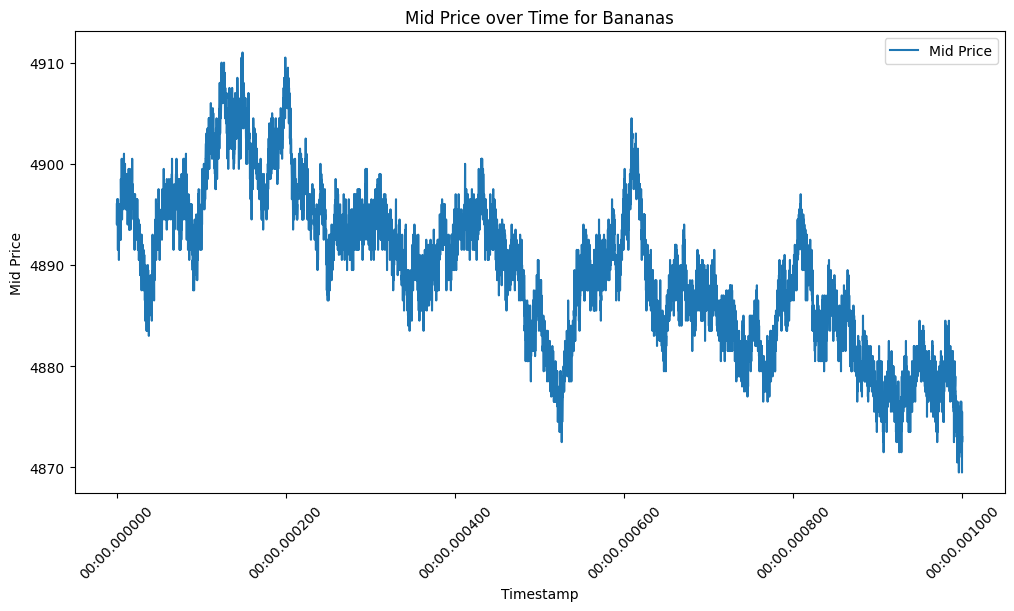

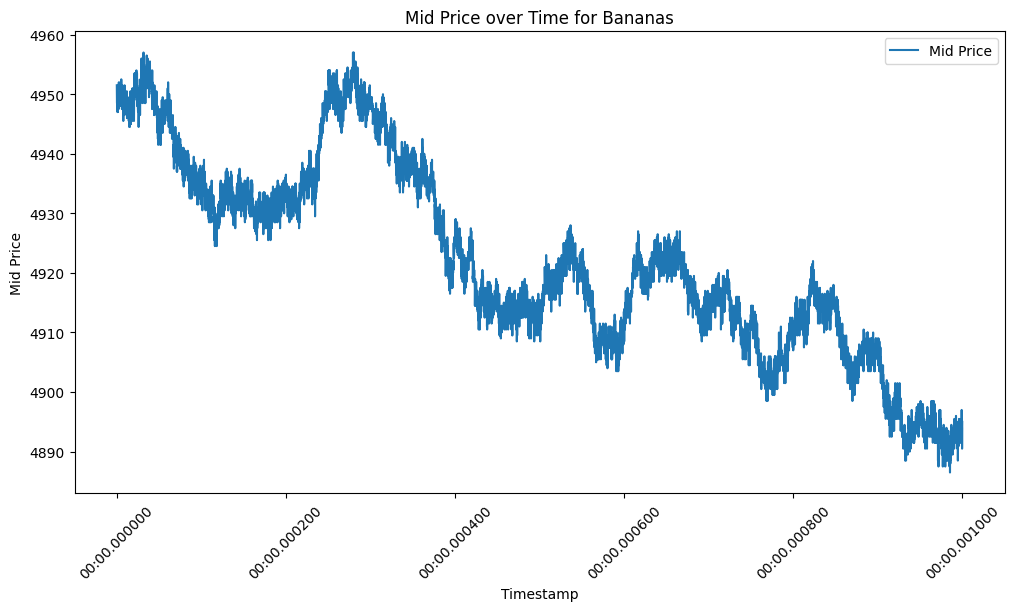

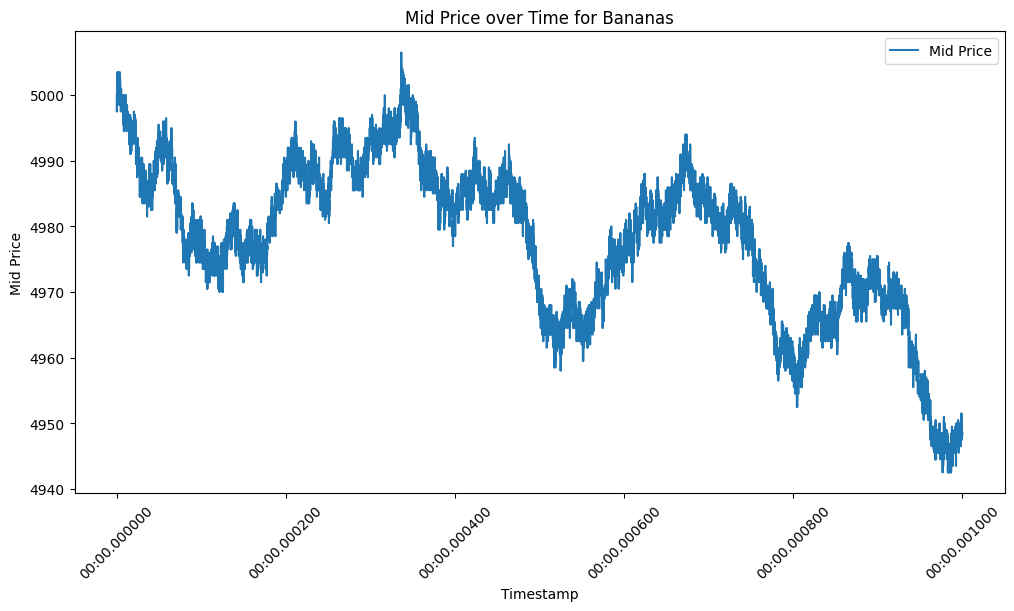

In [67]:
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_0.csv")
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-1.csv")
makegraphplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-2.csv")

In [68]:
def makerviplot(csvdirectory):
    # read the csv file
    df = pd.read_csv(csvdirectory, delimiter=';')

    # group the data by timestamp and calculate the average mid price
    grouped = df.groupby('timestamp')['mid_price'].mean()

    # calculate the RVI with a lookback of 2
    price_changes = grouped.diff().dropna()
    std_dev = price_changes.rolling(2).std()
    avg_change = price_changes.rolling(2).mean()
    rvi = std_dev / avg_change * 100

    # convert the timestamp column to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(12,6))

    # plot the RVI line as a dotted line
    ax.plot(grouped.index[1:], rvi, linestyle=':', label='RVI')

    # set the title and axis labels
    ax.set_title('Mid Price over Time')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Mid Price')

    # rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # show the legend
    ax.legend()

    # show the plot
    plt.show()


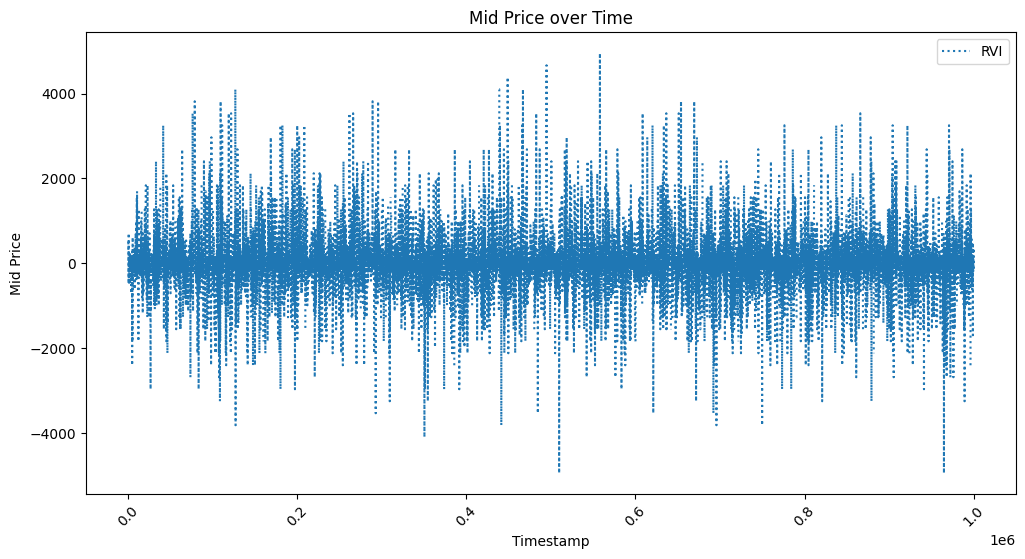

In [69]:
makerviplot("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_0.csv")

In [70]:
def plot_rvi_and_mid_price(csvdirectory):
    # read the csv file
    df = pd.read_csv(csvdirectory, delimiter=';')

    # filter the data to only include rows where the product is "BANANAS"
    df = df[df['product'] == 'BANANAS']

    # group the data by timestamp and calculate the average mid price
    grouped = df.groupby('timestamp')['mid_price'].mean()

    # calculate the RVI with a lookback of 2
    price_changes = grouped.diff().dropna()
    std_dev = price_changes.rolling(2).std()
    avg_change = price_changes.rolling(2).mean()
    rvi = std_dev / avg_change * 100

    # convert the timestamp column to a datetime object
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12,6))

    # plot the mid-price data on the left axis as a solid line
    ax1.plot(df['timestamp'], df['mid_price'], label='Mid Price', color='b')
    ax1.set_ylabel('Mid Price', color='b')

    # create a second y-axis on the right side for the RVI data
    ax2 = ax1.twinx()

    # plot the RVI data on the right axis as a dotted line
    ax2.plot(grouped.index[1:], rvi, linestyle=':', label='RVI', color='r')
    ax2.set_ylabel('RVI', color='r')

    # set the title and axis labels
    ax1.set_title('Mid Price and RVI over Time for Bananas')
    ax1.set_xlabel('Timestamp')

    # rotate the x-axis tick labels for better readability
    plt.xticks(rotation=45)

    # show the legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # show the plot
    plt.show()


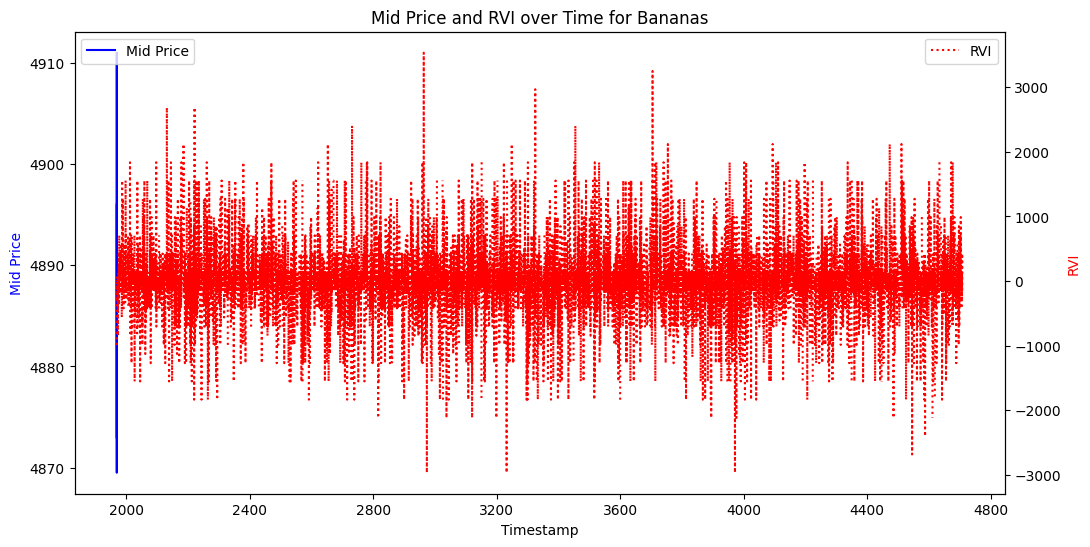

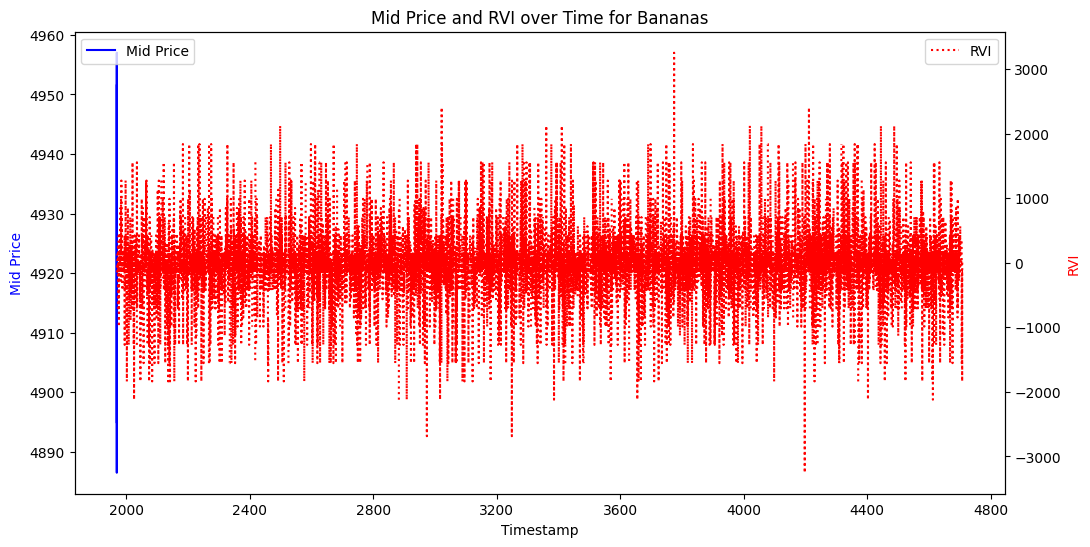

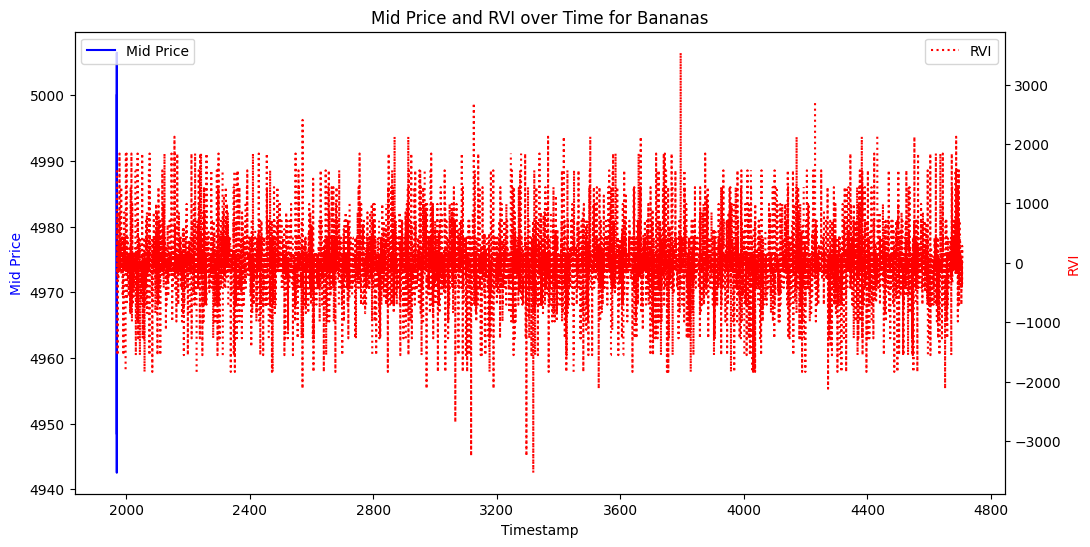

In [71]:
plot_rvi_and_mid_price("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_0.csv")
plot_rvi_and_mid_price("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-1.csv")
plot_rvi_and_mid_price("C:\\Users\\leona\\Documents\\Coding the humanities\\Prosperity game\\island-data-bottle-round-1\\prices_round_1_day_-2.csv")